In [6]:
# Importing necessary libraries
import pandas as pd

# Step 1: Load the Dataset
# Replace 'your_dataset.csv' with the actual path to your dataset file
file_path = 'house_prices.csv'
data = pd.read_csv(file_path)

# Step 2: Basic Data Understanding
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

# Display the shape of the dataset
print("\nShape of the dataset:")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# Display the data types of each column
print("\nData types of each column:")
print(data.dtypes)

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
display(data.describe())


First few rows of the dataset:

Shape of the dataset:
Rows: 545, Columns: 13

Data types of each column:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Summary statistics of the dataset:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
missing_values = data.isnull().sum()
display(missing_values[missing_values > 0])


Series([], dtype: int64)

Histograms for numerical features:


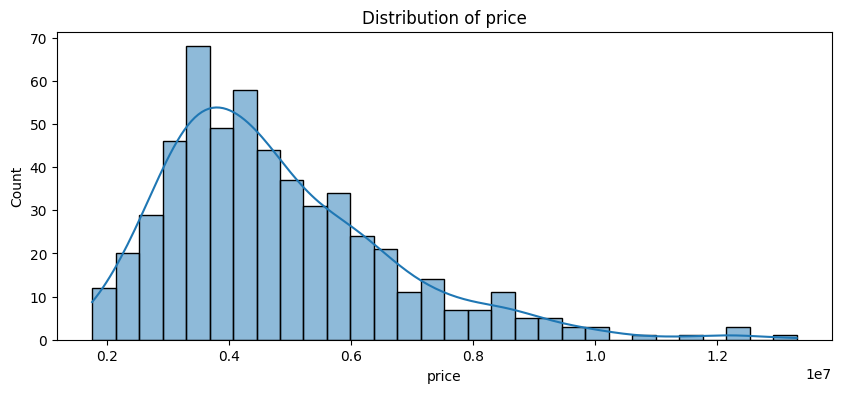

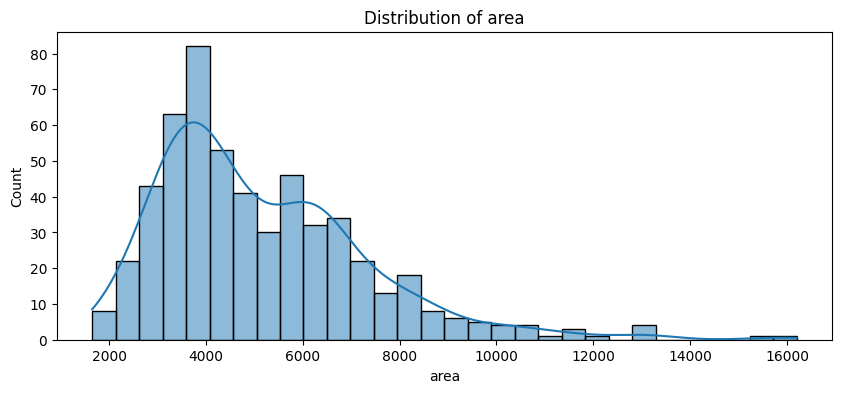

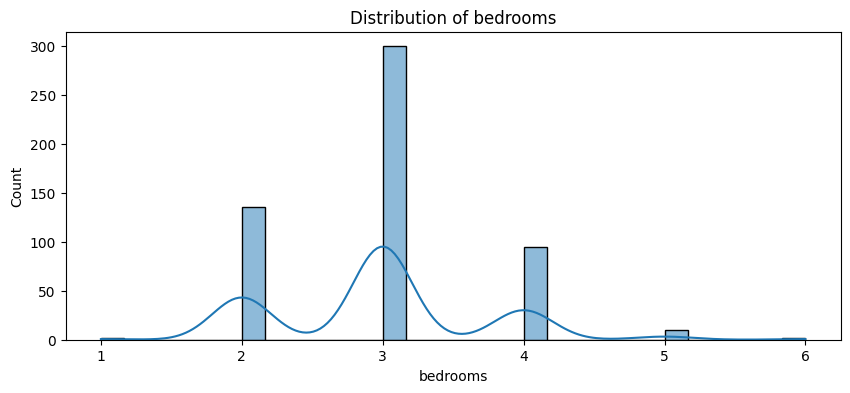

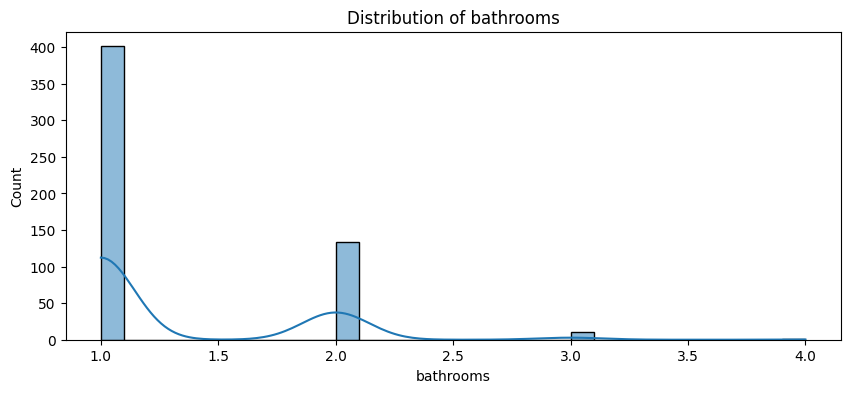

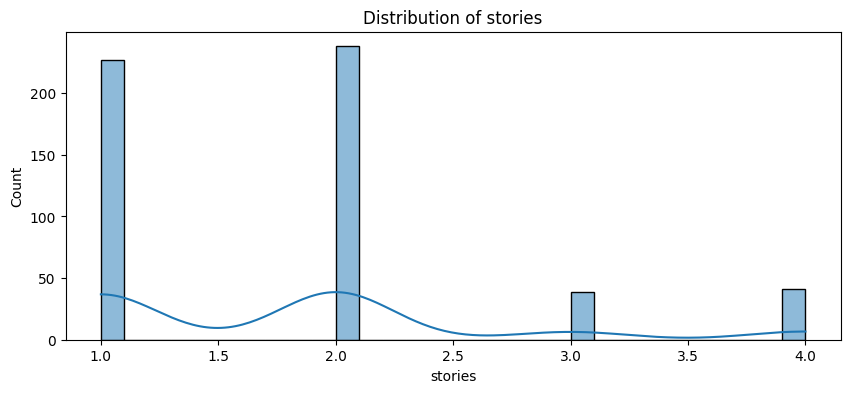

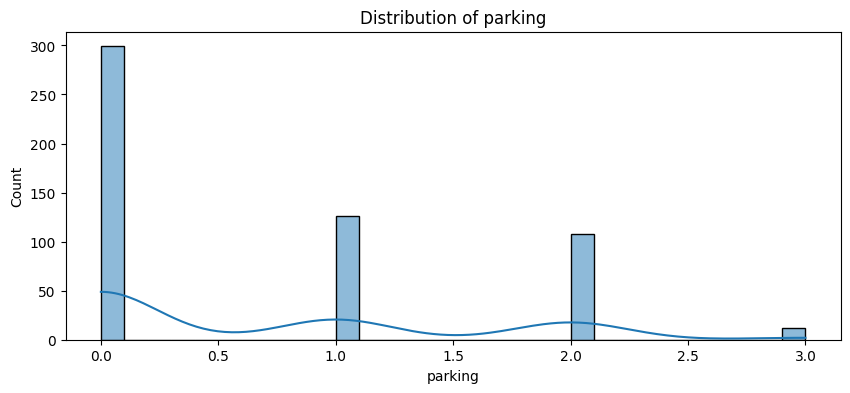

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
print("Histograms for numerical features:")
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


Scatter plots for numerical features vs SalePrice:


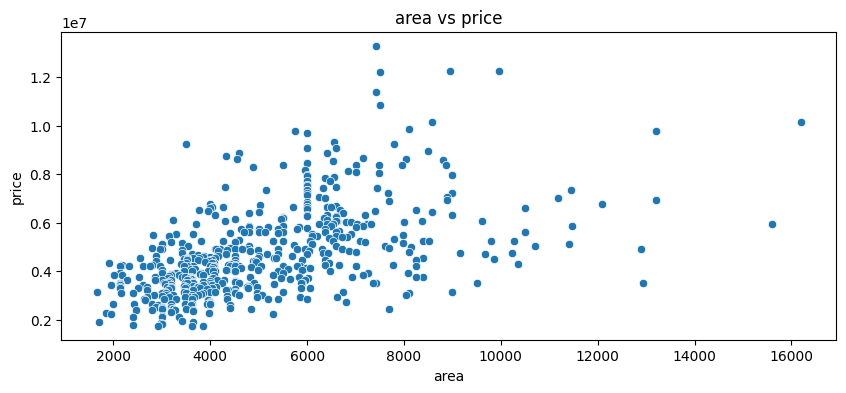

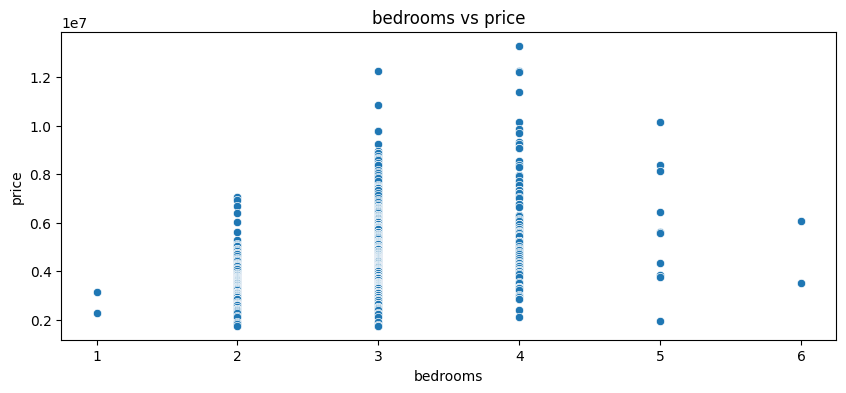

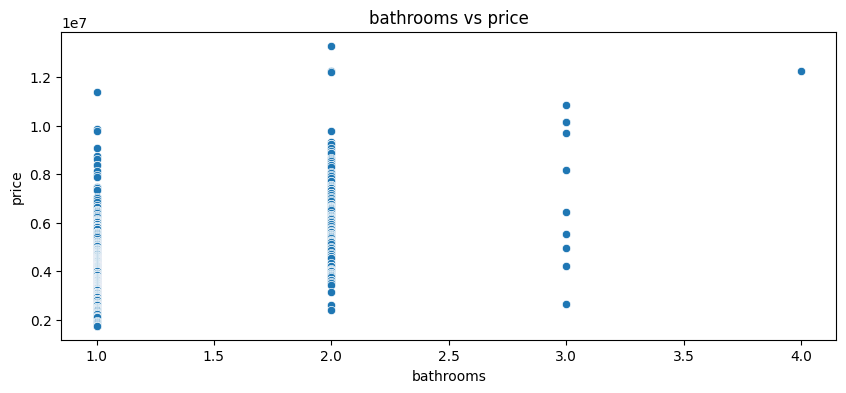

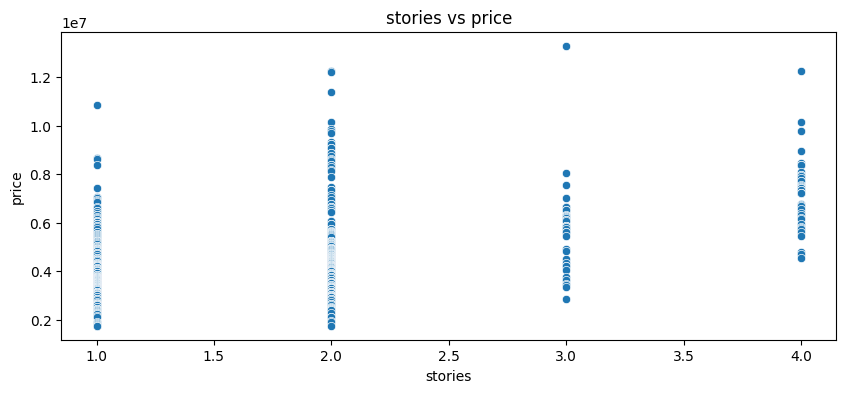

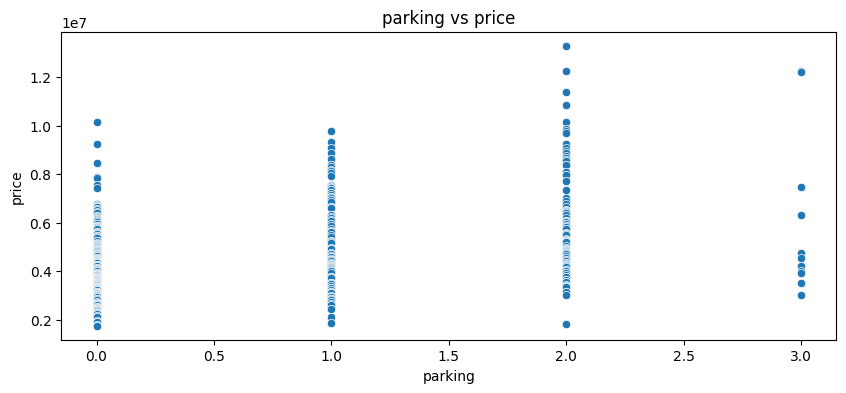

In [14]:
print("Scatter plots for numerical features vs SalePrice:")
target_variable = 'price'
for feature in numerical_features:
    if feature != target_variable:
        plt.figure(figsize=(10, 4))
        sns.scatterplot(x=data[feature], y=data[target_variable])
        plt.title(f'{feature} vs {target_variable}')
        plt.show()


Correlation heatmap:


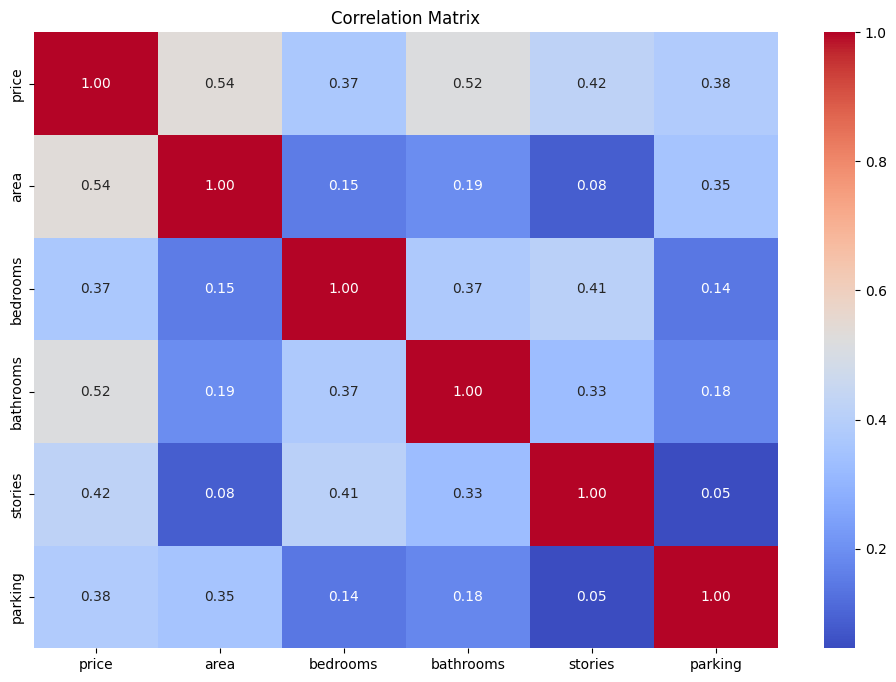

In [17]:
print("Correlation heatmap:")
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
data_clean = data.dropna(subset=[target_variable])
data_numeric = data_clean.select_dtypes(include=['int64', 'float64'])
data_numeric = data_numeric.fillna(data_numeric.mean())
X = data_numeric.drop(columns=[target_variable])
Y = data_numeric[target_variable]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, Y)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature importance (Top 10 features):")
display(feature_importance_df.head(10))

Feature importance (Top 10 features):


,Feature,Importance
0,area,0.599123
2,bathrooms,0.164758
4,parking,0.090154
3,stories,0.080635
1,bedrooms,0.065331


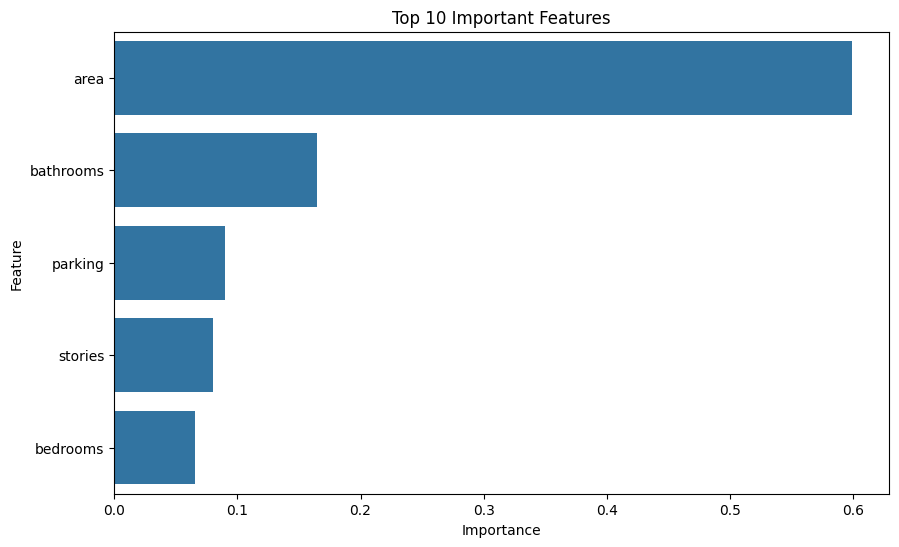

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()
